In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [49]:
pd.set_option('display.max_colwidth', -1)

In [50]:
cd Pickled_from_mongo/

[Errno 2] No such file or directory: 'Pickled_from_mongo/'
/home/jovyan/capstone-52/Pickled_from_mongo


In [136]:
df = pd.read_pickle('../Pickled_from_mongo/combined_eg_gulf.p')

In [273]:
df.shape

(940, 5)

In [138]:
df = df.drop(['_id', ], axis=1)


In [54]:
df = df.set_index(['cleaned_name'])

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 421
Data columns (total 5 columns):
cleaned_geo        940 non-null object
cleaned_name       940 non-null object
cleaned_text       940 non-null object
class              940 non-null object
class_numerical    940 non-null int64
dtypes: int64(1), object(4)
memory usage: 44.1+ KB


In [140]:
df.sample(8)

,cleaned_geo,cleaned_name,cleaned_text,class
303,None,ork9GFNaU0jF0Qi,ازيك — مش كويس والله دعواتك,EG
66,None,MubarkAlkhatlan,ما اكلم الدكاترة يغيرون درجتي .. واخذته درس لا تايس بنص الطريج شد حيلك للاخير,GULF
89,None,FATMA__1911,عايزه حد يقولي ازيك عشان اتخانق معاه,EG
316,"Jeddah, Saudi Arabia",munir_alhaddad,مغسلة للقطارات,GULF
237,None,Marawan90381063,: ازيك يختي,EG
124,None,error_404_0,الولية بقولها ازيك يا حاجه صباح الخير بتقولي صباح الخير ليه ياختي انتي لسه صاحيه!! *يا الله يا ولي الصابرين*,EG
149,Jeddah / KSA,Thaimzzz,ازيك يا جميل... بالحضن يا حبيبي,EG
9,None,_Alsh67,انا نظامي اخليهم يسمعون اول دقايق والي بعده,GULF


In [135]:
df[df.index=='adoom101']

,cleaned_geo,cleaned_text,class,class_numerical
cleaned_name,,,,
adoom101,الاسكندرية,لما البنت اللي بتحبها تكون واقفه مع ابوها وانت بقالك كتير مشوفتهاش والنبي ياحج متعرفش شارع ياواحشني رد عليا ازيك سل…,EG,0


## Benchmark LSA with no stop words

### Label Encode the Categories


In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
le = LabelEncoder()
df['class_numerical'] = le.fit_transform(df['class'])

In [143]:
df.shape

(940, 5)

In [144]:
df.sample(8)

,cleaned_geo,cleaned_name,cleaned_text,class,class_numerical
58,Tanta Egypt,Wael_Awad2,ازيك يا كسمك. لما انت مش راجل وخول زيك زي خولات الجماعة تشتم وتجري؟ يابن ال…,EG,0
264,"Saudi , Riyadh",nawaf11g,المتستر اللي ما يدري عماله كم يبيعون يبي له ينتبه . حلاق .. مغسلة .. بقالة الخ . الان ممكن يوقفون خدماته,GULF,1
311,Saudi Arabia,MNR_1416,: فيه بطحاء قريش اسمها الرواق العثماني اكتب اسمها في قوقل ماب وتطلع لك ممتازة ومتوفر فيها مغسلة وصالون وجلس…,GULF,1
179,"جنوب سيناء, مصر",sinawia,: ازيك ياموهيتي,EG,0
212,Saudi Arabia,salt3on,مغسلة مركبة بمسمارين و شوية سيلكون مصيرها السقوط اذا مو اليوم بكره... لاتلوم الناس بس لوم الشركة المنفذة ايضا,GULF,1
20,None,almahdi__f,شنو هذا ابي اعرف !!,GULF,1
112,None,Q_aljohra,ولج اللي معاها حمارها حطتها بنص الطريج هههههههههههه,GULF,1
13,مراح الوالد,mle3_al8eem,متعني للعاشره عشان اتقهوى يالله الخيره ماتحسفت الا يوم وصلت نص الطريج,GULF,1


In [145]:
df.class_numerical.unique()


array([0, 1])

In [201]:
df.head()

,cleaned_geo,cleaned_name,cleaned_text,class,class_numerical
0,None,kamal,أزاي أقول لك كنا زمان ... والماضي كان فى الغيب بكره واللي أحنا فيه دلوقت كمان ... ح يفوت علينا ولا ندري,EG,0
1,Egypt,agabdelrehim,هي آراء آه بس أزاي أجويرو منتهي يعني أمال لو مكنش الهداف التاريخي للسيتي و كل موسم اقل عدد من الاهداف…,EG,0
2,None,ElsndubadE,أنت صيني أزاي تقارن شادي بالخطيب ألي هو الوحيد ألي خد الكورة الذهبية من مصر وبشهادت الزملكاوي قبل الأ…,EG,0
3,None,h_sawires,أزاي الناس كانت بتغرد في الخمسينات قبل إختراع تويتر.,EG,0
4,Egypt,Hagerelmor,التوينز اللي معاها كل الحلو والوحش والمصايب والاكل والفشل مش عارفه من غيرك كنت هعيش أزاي ربنا يخليكي ليا ومش تويته توصفك,EG,0


### Prepare Document Term Matrix


In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [147]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1)


### TFIDF

In [148]:
document_term_matrix_sps = tfidf_vectorizer.fit_transform(df.cleaned_text)

In [204]:
document_term_matrix_sps


<940x4297 sparse matrix of type '<class 'numpy.float64'>'
	with 9954 stored elements in Compressed Sparse Row format>

In [209]:
tfidf_vectorizer.get_feature_names()

['___',
 '_ثواني',
 '_ضمان١٠سنوات',
 'about',
 'al',
 'and',
 'aziz',
 'cousin',
 'day',
 'depressed',
 'dreamsste',
 'full',
 'hahahahahaha',
 'humor',
 'jeddah',
 'joke',
 'live',
 'nada',
 'network',
 'of',
 'on',
 'patient',
 'plan',
 'pvc',
 'qinصناعة',
 'rice',
 'riyadh',
 'road',
 'sensé',
 'sh',
 'smiling',
 'so',
 'soundtrack',
 'unnamed',
 'via',
 'what',
 'whatsapp',
 'you',
 'آخر',
 'آراء',
 'آمالي',
 'آمين',
 'آنا',
 'آه',
 'آيه',
 'أأجدع',
 'أبدا',
 'أبدي',
 'أبسلوتلي',
 'أبطال',
 'أبكى',
 'أبنائهم',
 'أبي',
 'أبيه',
 'أترك',
 'أتركني',
 'أتكلم',
 'أتكلمت',
 'أجد',
 'أجمعين',
 'أجويرو',
 'أحد',
 'أحسن',
 'أحلي',
 'أحنا',
 'أحواضنا',
 'أخبار',
 'أخبارك',
 'أخدت',
 'أخرقصيده',
 'أخو',
 'أخون',
 'أدخن',
 'أدعي',
 'أدق',
 'أدليك',
 'أرب',
 'أرباح',
 'أرضية',
 'أريد',
 'أزاي',
 'أزي',
 'أسالك',
 'أستوعب',
 'أسمر',
 'أسمع',
 'أشخاص',
 'أشده',
 'أشعلت',
 'أصحاب',
 'أصلا',
 'أصلي',
 'أصور',
 'أطوف',
 'أعادة',
 'أعتقد',
 'أعرض',
 'أعرف',
 'أعظم',
 'أعقاب',
 'أعلم',
 'أعمالنا',
 'أ

In [210]:
document_term_matrix_df = pd.DataFrame(document_term_matrix_sps.toarray(),
                                       index=df.index,
                                       columns=tfidf_vectorizer.get_feature_names())

In [211]:
document_term_matrix_df.head()

,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,depressed,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
pd.concat([df.cleaned_text, document_term_matrix_df], axis=1).sample(10)

,cleaned_text,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
370,: يا من اقسمت انك لن ترحل ورحلت .. ازيك و ازي امك؟,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,: علي السوشيال ميديا تلاقيها ب لسان طويل و اول ما تقابلها و تقولها ازيك خدودها بتتحول بقدره قادر ل كاتشب هاينز,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,هههههههههههه ازيك يا مستقبل وطن بقي..,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,: ازيك و أزي المدام و الولاد,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,ازيك |,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231,: مغسلة السيارات المتنقلة تلميع او غسيل السيارة نخدمك وانت في بيتك ودوامك و استراحتك للتواصل …,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,هيوق هيوق هيوق,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,: مره رز سلم على مديره قاله ازيك يا Rice 🤦‍️.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,زحمة والطريج شبه واقف إطقين هرنات علشان يمشي الطريج جد والله ؟!!! صجج حريييم,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266,شوف دورات مياه مواقف كدي مغسلة سيارات البرما,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Compute SVD of Document Term Matrix

In [152]:
from sklearn.decomposition import TruncatedSVD

In [213]:
n_components = 2
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]

In [214]:
svd_matrix = SVD.fit_transform(document_term_matrix_df)


In [215]:
SVD.explained_variance_ratio_


array([ 0.01409743,  0.01253092])

In [216]:
svd_matrix[:4]


array([[ 0.01114506,  0.00544175],
       [ 0.02368124,  0.00854668],
       [ 0.00969341,  0.00515789],
       [ 0.01863416,  0.00640693]])

### Load SVD Matrix with Documents and Labels


In [217]:
latent_semantic_analysis = pd.DataFrame(svd_matrix,
                                        index=document_term_matrix_df.index,
                                        columns=component_names)
latent_semantic_analysis['cleaned_text'] = df.cleaned_text
latent_semantic_analysis['class'] = df['class']

In [218]:
df.cleaned_text

0      أزاي أقول لك كنا زمان ... والماضي كان فى الغيب بكره واللي أحنا فيه دلوقت كمان ... ح يفوت علينا ولا ندري                  
1      هي آراء آه بس أزاي أجويرو منتهي يعني أمال لو مكنش الهداف التاريخي للسيتي و كل موسم اقل عدد من الاهداف…                   
2      أنت صيني أزاي تقارن شادي بالخطيب ألي هو الوحيد ألي خد الكورة الذهبية من مصر وبشهادت الزملكاوي قبل الأ…                   
3      أزاي الناس كانت بتغرد في الخمسينات قبل إختراع تويتر.                                                                     
4      التوينز اللي معاها كل الحلو والوحش والمصايب والاكل والفشل مش عارفه من غيرك كنت هعيش أزاي ربنا يخليكي ليا ومش تويته توصفك 
5      : عن الناس إلي ربنا بعتهالك عشان يقولك شوف آخر صبرك طلع حلو أزاي                                                         
6      شوفت لما تجاهلت الناس وشك نور أزاي                                                                                       
7      ده انا صاحيه من ساعه وزهقت هكمل أزاي بقيت اليوم من غير ما أنتحر                           

In [219]:
latent_semantic_analysis.sample(10)


,component_1,component_2,cleaned_text,class
41,0.015120,0.007281,لا قمته بعد اليوم بقول مثل و مو حافظته الطريج الي يودي و مادري شنو,GULF
59,0.655754,-0.012462,: ازيك مش ازيك,EG
126,0.018878,0.005534,انهرت ضيعت الطريج وصلت لي الجهرا ودقيت على ابوي وصلني لي البيت,GULF
480,0.041520,0.015996,: *ماما انا أخدت كوباية من النيش*.. -...,EG
397,0.013787,0.009067,* احنا لازم نسيب بعض ** ادخلي بس اعمليلي كوباية شاي الأول وتعالي نتناقش ف الموضوع ده,EG
75,0.017049,0.011233,: هذا ينطبق عليه المثل : مشاري من أمامي والعاصفة من خلفي 🤣🤣 بس عجبني صملها يمثلني عند الاكشن,GULF
229,0.270261,-0.006082,حتى ازيك مستخسرها,EG
54,0.011992,0.002149,شلون جذي صار بليل !! والسيارات على كيفهم يغيرون الخط دشوا الخط الثاني زين,GULF
517,0.008602,0.008561,يسقط العالم وتحيا كوباية الشاي بالنعناع,EG
368,0.237542,-0.002876,(الساعه12) ازيك يا محمود' لا محمود إيه ،قوليلي يا محميحو:,EG


In [220]:
vocabulary_loadings = pd.DataFrame(SVD.components_,
                                   index=component_names,
                                   columns=tfidf_vectorizer.get_feature_names()).T

In [221]:
vocabulary_loadings['abs_component_1'] = np.abs(vocabulary_loadings.component_1)
vocabulary_loadings['abs_component_2'] = np.abs(vocabulary_loadings.component_2)

### Display Top Terms for Each Component

Top 10 Terms for Component 1

In [162]:
vocabulary_loadings.sort_values('abs_component_1',ascending=False).head(10)


,component_1,component_2,abs_component_1,abs_component_2
ازيك,0.851832,-0.019238,0.851832,0.019238
يا,0.361048,-0.006819,0.361048,0.006819
rice,0.073555,-0.002417,0.073555,0.002417
ايه,0.073032,0.000527,0.073032,0.000527
انا,0.071616,0.009392,0.071616,0.009392
على,0.070629,0.008533,0.070629,0.008533
رز,0.065003,-0.001996,0.065003,0.001996
مديرهم,0.062353,-0.002119,0.062353,0.002119
شوية,0.062180,-0.001501,0.062180,0.001501
مش,0.057308,0.004636,0.057308,0.004636


Top 10 Terms for Component 2


In [163]:
vocabulary_loadings.sort_values('abs_component_2',ascending=False).head(10)


,component_1,component_2,abs_component_1,abs_component_2
شطاف,0.002475,0.423204,0.002475,0.423204
ضمان,0.002273,0.376116,0.002273,0.376116
شاور,0.002170,0.365808,0.002170,0.365808
مع,0.013625,0.320226,0.013625,0.320226
مسطرة,0.001869,0.317030,0.001869,0.317030
صاعد,0.001672,0.284338,0.001672,0.284338
داليا,0.001238,0.211602,0.001238,0.211602
كاديا,0.001238,0.211602,0.001238,0.211602
سنتين,0.001238,0.211602,0.001238,0.211602
سنوات,0.002173,0.210875,0.002173,0.210875


### Plot Top Two Components


(-0.5, 1)

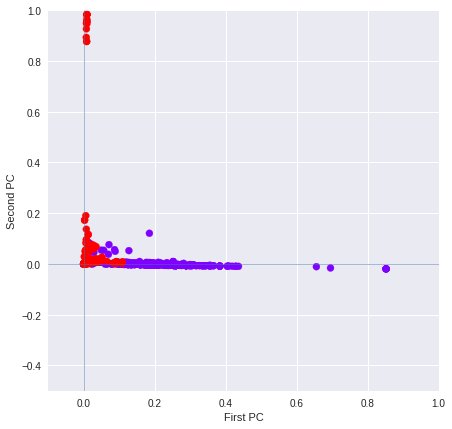

In [164]:
plt.figure(figsize=(7,7))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.5,1)

(-0.1, 1)

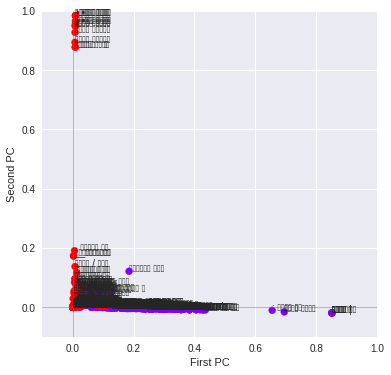

In [165]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

strings = df['cleaned_text'].values
for i, (x, y) in enumerate(zip(pc_1, pc_2)): 
    plt.text(x,y,strings[i][:10])

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.1,1)

(-0.3, 0.6)

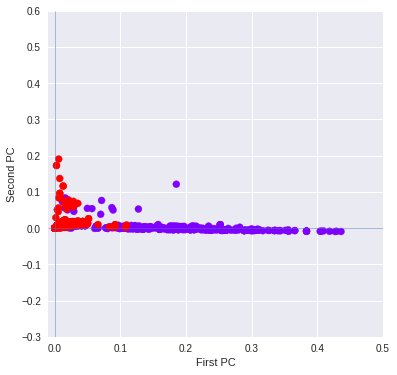

In [166]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.01,.5)
plt.ylim(-.3,.6)

In [167]:
eg_mask = latent_semantic_analysis['class'] == 'EG'


In [168]:
latent_semantic_analysis[eg_mask]

,component_1,component_2,cleaned_text,class
0,0.011076,0.006584,أزاي أقول لك كنا زمان ... والماضي كان فى الغيب بكره واللي أحنا فيه دلوقت كمان ... ح يفوت علينا ولا ندري,EG
1,0.023661,0.009270,هي آراء آه بس أزاي أجويرو منتهي يعني أمال لو مكنش الهداف التاريخي للسيتي و كل موسم اقل عدد من الاهداف…,EG
2,0.009655,0.006156,أنت صيني أزاي تقارن شادي بالخطيب ألي هو الوحيد ألي خد الكورة الذهبية من مصر وبشهادت الزملكاوي قبل الأ…,EG
3,0.018488,0.008544,أزاي الناس كانت بتغرد في الخمسينات قبل إختراع تويتر.,EG
4,0.028774,0.008369,التوينز اللي معاها كل الحلو والوحش والمصايب والاكل والفشل مش عارفه من غيرك كنت هعيش أزاي ربنا يخليكي ليا ومش تويته توصفك,EG
5,0.017067,0.005248,: عن الناس إلي ربنا بعتهالك عشان يقولك شوف آخر صبرك طلع حلو أزاي,EG
6,0.015091,0.007426,شوفت لما تجاهلت الناس وشك نور أزاي,EG
7,0.037801,0.016831,ده انا صاحيه من ساعه وزهقت هكمل أزاي بقيت اليوم من غير ما أنتحر,EG
8,0.029584,0.060647,أزاي اتعرفت علي افضل صديق/ة عندك/ي؟ — افضل صديقة عندي مع بعض من اولى ابتدائي مش فاكرة اتعرفنا ازاي,EG
9,0.046458,0.006253,اكيد مكنتيش هتقدري تعيشي ي بنتي ، انتي م غيري ولا اي حاجة أصلاً انا عارفهه ، وعارفه أن مش تويته توصفني ده اكي…,EG


In [169]:
gulf_mask = latent_semantic_analysis['class'] == 'GULF'

In [170]:
latent_semantic_analysis[gulf_mask]

,component_1,component_2,cleaned_text,class
0,3.015958e-02,0.009237,: على الاقل ارحم من ان تتعود على وجود احد ويغرقك اهتمام وحب ويغنيك عن الدنيا وبنص الطريج يخليك تعاني وتت…,GULF
1,1.881479e-02,0.007814,وحدة مكافحة الموز في الطريج,GULF
2,5.032094e-02,0.013467,انا صوت الفريج وبنتٍ تناديك تدليك الفرح وينه انا ثوبك وسبحةٍ في يدك واللي راح من عمرك انا اشيله أدليك الطريج اللي…,GULF
3,7.622567e-03,0.004809,اوك مسافة الطريج يايتلچ ‍️‍️‍️,GULF
4,1.217981e-02,0.005278,كلام جميل لكن وين التطبيق.طلع قانون للخدم ونشر بالجريدة الرسمية من زمان وللحين احنا ناطرين ا…,GULF
5,2.488107e-02,0.007148,الثالث علي الطريج طولي بالج اول الله️,GULF
6,1.050226e-02,0.006001,لما أكون مستعيله ويغلط السواق ف الطريج,GULF
7,1.398847e-02,0.003751,احبك كثر ماتوقف على جنب الطريج اشجار احبك كثر مايقسى الشتا وتهاجر طيوره..,GULF
8,8.441803e-03,0.004884,"لحد يسلمي الAUX ويقولي بسج توقفين بنص الاغنيه, الطريج دقايق وانا عندي اغنيه بسمعها!",GULF
9,1.994059e-02,0.004158,انا نظامي اخليهم يسمعون اول دقايق والي بعده,GULF


In [171]:
latent_semantic_analysis[(latent_semantic_analysis['class'] == 'EG') 
                         & (latent_semantic_analysis.component_2 > .050)]

,component_1,component_2,cleaned_text,class
8,0.029584,0.060647,أزاي اتعرفت علي افضل صديق/ة عندك/ي؟ — افضل صديقة عندي مع بعض من اولى ابتدائي مش فاكرة اتعرفنا ازاي,EG
38,0.027529,0.055341,: أنا مريض بمرض التفكير والتفاصييل.. لو أتكلمت مع حد كلمتين بس ، بحلل شخصيته ، وبحلل طريقه الكلام اللي قالهالي وادقق…,EG
118,0.127618,0.052584,أنا عندى مشكله ف الكلام مع الناس شات والله..لو حد قالى ازيك بقول تمام..الحمد لله..كويسة.. لكن انى ارد اقول وانت ازي…,EG
204,0.087111,0.056607,عائلات معتقلي اكديم ازيك يضربون عن الطعام تضامنا مع أبنائهم بسجون الاحتلال المغربية,EG
242,0.185337,0.120994,ماتركب ذودك مع ازيك,EG
378,0.019355,0.050133,ان شاء الله الواحد يقوم يصلي الفجر وبعدين يفطر مع كوباية كابتشينو كده وبعدين يستني لما الصبح يبتدي يطلع وأخرج عشان أصور السحاب ️,EG
380,0.020471,0.077660,السيجارة مع كوباية القهوة بتاعة الوقت دا غير أي حاجة ف اليوم كله,EG
386,0.018663,0.074798,كوباية شااااي مع هاااند فري ومشغل فيه اغاني محمد عبدالرحمن,EG
404,0.011739,0.073278,كوباية سحلب بالمكسرات مع حجر معسل هي حل لكل المشاكل دلوقتي,EG
422,0.015211,0.055753,: من يومين كنت قاعد مع بدو وماكنتش اعرف حوار إن كوباية الشاي لازم تتقلب عشان يبطّلوا يزوّدوها، الكوباية صغيرة جدًا وا…,EG


In [172]:
latent_semantic_analysis[(latent_semantic_analysis['class'] == 'GULF') 
                         & (latent_semantic_analysis.component_2 > .50)]

,component_1,component_2,cleaned_text,class
277,0.008619,0.876976,: سنتين: شطاف كاديا _ شطاف داليا سنوات: شاور مع مسطرة(صاعد نازل) كروم _ شاور مع مسطرة(صاعد نازل) ذهبي…,GULF
278,0.008619,0.876976,سنتين: شطاف كاديا _ شطاف داليا سنوات: شاور مع مسطرة(صاعد نازل) كروم _ شاور مع مسطرة(صاعد نازل) ذهبي…,GULF
280,0.009524,0.983177,: •ضمان سنتين /شطاف كاديا /شطاف داليا •ضمان سنوات /شاور مع مسطرة(صاعد نازل) كروم /شاور مع مسطرة(…,GULF
331,0.009470,0.956353,: •ضمان سنتين /شطاف كاديا /شطاف داليا •ضمان سنوات /شاور مع مسطرة(صاعد نازل) كروم /شاور مع مسطر…,GULF
344,0.009524,0.983177,•ضمان سنتين /شطاف كاديا /شطاف داليا •ضمان سنوات /شاور مع مسطرة(صاعد نازل) كروم /شاور مع مسطرة(…,GULF
374,0.009399,0.947235,•ضمان سنتين شطاف كاديا شطاف داليا •ضمان سنوات شاور مع مسطرةصاعد نازل كروم شاور مع مسطرة(صاعد ن…,GULF
381,0.009470,0.956353,•ضمان سنتين /شطاف كاديا /شطاف داليا •ضمان سنوات /شاور مع مسطرة(صاعد نازل) كروم /شاور مع مسطر…,GULF
406,0.007963,0.926774,ضمان سنتين شطاف كاديا شطاف داليا ضمان سنوات شاور مع مسطرة(صاعد…,GULF
407,0.009318,0.982955,ضمان سنتين شطاف كاديا شطاف داليا ضمان سنوات شاور مع مسطرة(صاعد نازل) كروم شاور مع مسطرة(صاعد…,GULF
408,0.007634,0.893208,ضمان سنتين شطاف كاديا شطاف داليا ضمان سنوات شاور مع مسطرة(صاعد نا…,GULF


### LSA_Topic Modeling

In [225]:
n_components = 50
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]

In [226]:
svd_matrix = SVD.fit_transform(document_term_matrix_df)

In [227]:
sum(SVD.explained_variance_ratio_)

0.22353425346096437

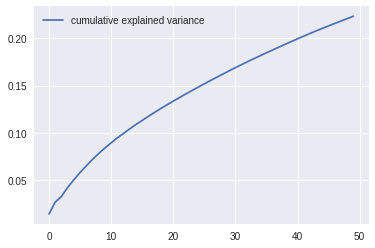

In [228]:
plt.plot(range(50), np.cumsum(SVD.explained_variance_ratio_), label='cumulative explained variance')
plt.legend()

#### Display Top Terms for Each Component 'topics'


In [229]:
vocabulary_expression = pd.DataFrame(SVD.components_,
                                     index=component_names,
                                     columns=tfidf_vectorizer.get_feature_names()).T


In [230]:

for i in range(1,11):
    vocabulary_expression['abs_component_{}'.format(i)] = np.abs(vocabulary_expression['component_{}'.format(i)])

In [231]:
vocabulary_expression['abs_component_1'].sort_values(ascending=False).head(7)


ازيك    0.851840
يا      0.361024
rice    0.073527
ايه     0.073097
انا     0.071494
على     0.070692
رز      0.064986
Name: abs_component_1, dtype: float64

In [180]:
vocabulary_expression['abs_component_2'].sort_values(ascending=False).head(7)

شطاف     0.423313
ضمان     0.376112
شاور     0.365911
مع       0.320403
مسطرة    0.317120
صاعد     0.284418
كاديا    0.211657
Name: abs_component_2, dtype: float64

In [181]:
vocabulary_expression['abs_component_3'].sort_values(ascending=False).head(7)

الطريج    0.394985
من        0.347223
مغسلة     0.308205
في        0.258099
كوباية    0.213848
ازيك      0.202962
انا       0.160498
Name: abs_component_3, dtype: float64

In [182]:
vocabulary_expression['abs_component_4'].sort_values(ascending=False).head(7)

يا        0.395064
rice      0.303598
رز        0.282931
ازيك      0.271133
مديرهم    0.268310
حبو       0.263731
يسلمو     0.263731
Name: abs_component_4, dtype: float64

In [183]:
vocabulary_expression['abs_component_5'].sort_values(ascending=False).head(7)

الطريج    0.678019
مغسلة     0.378568
عامل      0.198189
من        0.165922
مسافة     0.136437
سيارات    0.133919
السلام    0.103795
Name: abs_component_5, dtype: float64

In [184]:
vocabulary_expression['abs_component_6'].sort_values(ascending=False).head(7)

كوباية    0.331680
لو        0.288010
الطريج    0.275172
انا       0.267590
قالي      0.251575
حد        0.249005
عامل      0.243291
Name: abs_component_6, dtype: float64

In [185]:
vocabulary_expression['abs_component_7'].sort_values(ascending=False).head(7)

كوباية    0.448404
يا        0.303130
قالي      0.202925
الطريج    0.202011
عامل      0.192092
حد        0.190073
لو        0.175037
Name: abs_component_7, dtype: float64

In [186]:
vocabulary_expression['abs_component_8'].sort_values(ascending=False).head(7)

عامل    0.662424
من      0.214164
قالي    0.187709
حد      0.176424
لو      0.175723
انا     0.160937
يا      0.159097
Name: abs_component_8, dtype: float64

In [187]:
vocabulary_expression['abs_component_9'].sort_values(ascending=False).head(7)

يا        0.601682
عامل      0.342873
ازيك      0.196870
كوباية    0.159890
في        0.134185
حبو       0.126098
يسلمو     0.126098
Name: abs_component_9, dtype: float64

In [188]:
vocabulary_expression['abs_component_10'].sort_values(ascending=False).head(7)

جامعة       0.501064
هي          0.385533
للشهادات    0.189202
سعود        0.189202
شهادة       0.189202
أكبر        0.189202
الآن        0.189202
Name: abs_component_10, dtype: float64

### Search

#### Encode the search term using the same vectorizer


In [189]:
search_sentences = [
{"sentence": "الثوره المصريه تحولت من ثورة شارع محدش يزعل", "title" : "EG"},
{"sentence": "نفسي اكون زيك بعرف اطنشك أو اخليك اخر حاجة و بعد كده اضحك عليك بكلمتين و انت تصدق كل مرة عادي", "title" : "EG"},
{"sentence": "بما أن أغلب اللي متابعني مش بقدر اوصلهم أغلب الوقت. . ف كل يوم هعمل تويته آخر اليوم اللي هيعمل لايك", "title" : "EG"},
{"sentence": "مقاومتنا للأشياء طلعت بتقل مع الزمن، مبقيناش نناهد ف حاجة.. و مش عشان أحنا جامدين قوي. هو حيلنا بس", "title" : "EG"},
{"sentence": "عارف ايه احلى حاجة حاصلة ليا انى منك وانت برضه بتجرى فيا انت اخر كل يوم باخدك ف حضنى وانت اول", "title" : "EG"},
{"sentence": "القاضى اللى حكم على المعتقلين بالاعدام هو هو نفس القاضى اللى هيراقب الانتخابات", "title" : "EG"},
{"sentence": "وفجأة تيجي سيرة حاجة في وسط الكلام تقلب عليك القديم والجديد وترسم في دماغك علامات استفهام مالهاش", "title" : "EG"},
{"sentence": "السنة اللي فاتت الاعلام الانجليزي قال المفروض بيب يعرف انه في البريمييرليج لازم يتأقلم و يلعب كورتنا", "title" : "EG"},
{"sentence": "حرب و قتال و ناس تموت و هذا الدلخ يقول سعيد و مثل أجواء كرة القدم ", "title" : "GULF"},
{"sentence": "من غباء الهلالي الدلخ اللي يفتخر بفوز فريقه من قيادة رئيس الحكام كلاتنبيرغ له سنه ماسنع الحكام السعوديين", "title" : "GULF"},
{"sentence": "شفتوا هوشة شيعان وغالي لو هي بين الهلاليين كان شفتوا هاشتاق كبر راسهم المنسم وكان جاك هذا الدلخ ", "title" : "GULF"},
{"sentence": "ذويه ارفضوا لانه عيار جمبازي مافيه شي وبليس مايكسر اماعينه يامال لضعفه قطو بو سبعة ارواح ", "title" : "GULF"},
{"sentence": "صج ياجماعه في سوال محيرني ليش المتان مافيهم النفسيه عكس الضعاف تقول خاشوقه ومنفس", "title" : "GULF"},
{"sentence": "لم نعاند التاريخ مسيو خاشوقه بل الواقع والعقلانية ابعدنا من التدمير والانفلات", "title" : "GULF"},
{"sentence": "أي والله وعندي عنه ابو خاشوقة أسرار لا تشرف قد أقولها اذا لم يلجم لسانه عن سب وطني", "title" : "GULF"},
{"sentence": "قبل ماتتكلمين يالطيبه افهمي السالفه ومنب ملزومه بسنابي اني اشرح كل شيء صارت بالتفصيل بس لانك قلق خل", "title" : "GULF"},
]

In [190]:
search_sentences_df = pd.DataFrame(search_sentences)


In [232]:
search_sentences_df.sample(4)

,sentence,title
9,من غباء الهلالي الدلخ اللي يفتخر بفوز فريقه من قيادة رئيس الحكام كلاتنبيرغ له سنه ماسنع الحكام السعوديين,GULF
8,حرب و قتال و ناس تموت و هذا الدلخ يقول سعيد و مثل أجواء كرة القدم,GULF
10,شفتوا هوشة شيعان وغالي لو هي بين الهلاليين كان شفتوا هاشتاق كبر راسهم المنسم وكان جاك هذا الدلخ,GULF
11,ذويه ارفضوا لانه عيار جمبازي مافيه شي وبليس مايكسر اماعينه يامال لضعفه قطو بو سبعة ارواح,GULF


In [192]:
search_sentences_df.sentence


0     الثوره المصريه تحولت من ثورة شارع محدش يزعل                                                             
1     نفسي اكون زيك بعرف اطنشك أو اخليك اخر حاجة و بعد كده اضحك عليك بكلمتين و انت تصدق كل مرة عادي           
2     بما أن أغلب اللي متابعني مش بقدر اوصلهم أغلب الوقت. . ف كل يوم هعمل تويته آخر اليوم اللي هيعمل لايك     
3     مقاومتنا للأشياء طلعت بتقل مع الزمن، مبقيناش نناهد ف حاجة.. و مش عشان أحنا جامدين قوي. هو حيلنا بس      
4     عارف ايه احلى حاجة حاصلة ليا انى منك وانت برضه بتجرى فيا انت اخر كل يوم باخدك ف حضنى وانت اول           
5     القاضى اللى حكم على المعتقلين بالاعدام هو هو نفس القاضى اللى هيراقب الانتخابات                          
6     وفجأة تيجي سيرة حاجة في وسط الكلام تقلب عليك القديم والجديد وترسم في دماغك علامات استفهام مالهاش        
7     السنة اللي فاتت الاعلام الانجليزي قال المفروض بيب يعرف انه في البريمييرليج لازم يتأقلم و يلعب كورتنا    
8     حرب و قتال و ناس تموت و هذا الدلخ يقول سعيد و مثل أجواء كرة القدم                                       
9

In [233]:
search_terms_encoded = tfidf_vectorizer.transform(search_sentences_df.sentence)

In [252]:
search_terms_encoded_df = pd.DataFrame(search_terms_encoded.toarray(), 
                                       index=search_sentences_df.sentence, 
                                       columns=tfidf_vectorizer.get_feature_names())

In [253]:
search_terms_encoded_df.head()

,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,depressed,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
sentence,,,,,,,,,,,,,,,,,,,,,
الثوره المصريه تحولت من ثورة شارع محدش يزعل,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
نفسي اكون زيك بعرف اطنشك أو اخليك اخر حاجة و بعد كده اضحك عليك بكلمتين و انت تصدق كل مرة عادي,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
بما أن أغلب اللي متابعني مش بقدر اوصلهم أغلب الوقت. . ف كل يوم هعمل تويته آخر اليوم اللي هيعمل لايك,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
مقاومتنا للأشياء طلعت بتقل مع الزمن، مبقيناش نناهد ف حاجة.. و مش عشان أحنا جامدين قوي. هو حيلنا بس,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
عارف ايه احلى حاجة حاصلة ليا انى منك وانت برضه بتجرى فيا انت اخر كل يوم باخدك ف حضنى وانت اول,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Select a Random Search Term

In [254]:
random_search_term_df = search_terms_encoded_df.sample(3)
random_search_term_df.head()

,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,depressed,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
sentence,,,,,,,,,,,,,,,,,,,,,
عارف ايه احلى حاجة حاصلة ليا انى منك وانت برضه بتجرى فيا انت اخر كل يوم باخدك ف حضنى وانت اول,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
شفتوا هوشة شيعان وغالي لو هي بين الهلاليين كان شفتوا هاشتاق كبر راسهم المنسم وكان جاك هذا الدلخ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
من غباء الهلالي الدلخ اللي يفتخر بفوز فريقه من قيادة رئيس الحكام كلاتنبيرغ له سنه ماسنع الحكام السعوديين,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Append the search term to the document term matrix


In [255]:
random_search_term_df

,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,depressed,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
sentence,,,,,,,,,,,,,,,,,,,,,
عارف ايه احلى حاجة حاصلة ليا انى منك وانت برضه بتجرى فيا انت اخر كل يوم باخدك ف حضنى وانت اول,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
شفتوا هوشة شيعان وغالي لو هي بين الهلاليين كان شفتوا هاشتاق كبر راسهم المنسم وكان جاك هذا الدلخ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
من غباء الهلالي الدلخ اللي يفتخر بفوز فريقه من قيادة رئيس الحكام كلاتنبيرغ له سنه ماسنع الحكام السعوديين,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [256]:
dtm_with_search_term.head()

,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,depressed,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [257]:
dtm_with_search_term.tail()

,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,depressed,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(أي والله وعندي عنه ابو خاشوقة أسرار لا تشرف قد أقولها اذا لم يلجم لسانه عن سب وطني, GULF)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(قبل ماتتكلمين يالطيبه افهمي السالفه ومنب ملزومه بسنابي اني اشرح كل شيء صارت بالتفصيل بس لانك قلق خل, GULF)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(وفجأة تيجي سيرة حاجة في وسط الكلام تقلب عليك القديم والجديد وترسم في دماغك علامات استفهام مالهاش, EG)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [258]:
random_search_term_df

,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,depressed,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
sentence,,,,,,,,,,,,,,,,,,,,,
عارف ايه احلى حاجة حاصلة ليا انى منك وانت برضه بتجرى فيا انت اخر كل يوم باخدك ف حضنى وانت اول,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
شفتوا هوشة شيعان وغالي لو هي بين الهلاليين كان شفتوا هاشتاق كبر راسهم المنسم وكان جاك هذا الدلخ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
من غباء الهلالي الدلخ اللي يفتخر بفوز فريقه من قيادة رئيس الحكام كلاتنبيرغ له سنه ماسنع الحكام السعوديين,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
document_term_matrix_df.head()

,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,depressed,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
dtm_with_search_term = document_term_matrix_df.append(random_search_term_df)

In [261]:
random_search_term_df

,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,depressed,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
sentence,,,,,,,,,,,,,,,,,,,,,
عارف ايه احلى حاجة حاصلة ليا انى منك وانت برضه بتجرى فيا انت اخر كل يوم باخدك ف حضنى وانت اول,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
شفتوا هوشة شيعان وغالي لو هي بين الهلاليين كان شفتوا هاشتاق كبر راسهم المنسم وكان جاك هذا الدلخ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
من غباء الهلالي الدلخ اللي يفتخر بفوز فريقه من قيادة رئيس الحكام كلاتنبيرغ له سنه ماسنع الحكام السعوديين,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [263]:
dtm_with_search_term.head()

,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,depressed,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [264]:
dtm_with_search_term.tail()

,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,depressed,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
عارف ايه احلى حاجة حاصلة ليا انى منك وانت برضه بتجرى فيا انت اخر كل يوم باخدك ف حضنى وانت اول,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
شفتوا هوشة شيعان وغالي لو هي بين الهلاليين كان شفتوا هاشتاق كبر راسهم المنسم وكان جاك هذا الدلخ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
من غباء الهلالي الدلخ اللي يفتخر بفوز فريقه من قيادة رئيس الحكام كلاتنبيرغ له سنه ماسنع الحكام السعوديين,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
component_names

['component_1',
 'component_2',
 'component_3',
 'component_4',
 'component_5',
 'component_6',
 'component_7',
 'component_8',
 'component_9',
 'component_10',
 'component_11',
 'component_12',
 'component_13',
 'component_14',
 'component_15',
 'component_16',
 'component_17',
 'component_18',
 'component_19',
 'component_20',
 'component_21',
 'component_22',
 'component_23',
 'component_24',
 'component_25',
 'component_26',
 'component_27',
 'component_28',
 'component_29',
 'component_30',
 'component_31',
 'component_32',
 'component_33',
 'component_34',
 'component_35',
 'component_36',
 'component_37',
 'component_38',
 'component_39',
 'component_40',
 'component_41',
 'component_42',
 'component_43',
 'component_44',
 'component_45',
 'component_46',
 'component_47',
 'component_48',
 'component_49',
 'component_50']

In [120]:
svd_matrix[0]

array([ 0.01111901,  0.00575559,  0.05697199, -0.00888257, -0.00480405,
        0.00313984, -0.01171508, -0.00871694,  0.00587655, -0.00551999,
       -0.03304297,  0.00573189,  0.10597138,  0.01127091, -0.06584403,
       -0.06386066, -0.00936879,  0.00368609, -0.00976475,  0.05519282,
       -0.02906392,  0.03274268, -0.01613179,  0.01386706, -0.05412744,
        0.00424041, -0.02312873,  0.01519608, -0.02091895, -0.02840595,
       -0.04460935,  0.00267992, -0.00222312, -0.03354839,  0.03366852,
        0.02783835,  0.03312897,  0.03842469, -0.02444161,  0.02591231,
       -0.03472548,  0.02121139,  0.03156459,  0.02114033,  0.01064539,
       -0.02637413, -0.03114196, -0.01569371,  0.06592599, -0.01266093])

In [113]:
svd_df = pd.DataFrame(svd_matrix, 
                      index=dtm_with_search_term.index, 
                      columns=component_names)

In [126]:
dtm_with_search_term[:2]

,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,depressed,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
kamal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
agabdelrehim,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Identify the Vector for our Search Term

In [114]:
search_term_svd_vector = svd_df.loc[random_search_term_df.index]
search_term_svd_vector

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_41,component_42,component_43,component_44,component_45,component_46,component_47,component_48,component_49,component_50
الثوره المصريه تحولت من ثورة شارع محدش يزعل,0.019746,0.010979,0.124306,-0.015089,-0.058725,-0.037004,0.018958,-0.074309,0.009829,-0.018269,...,0.029434,-0.001752,0.047272,-0.026336,-0.020169,0.005969,0.014068,-0.014521,-0.041144,0.00708


### Use Cosine Similarity to Find the Most Similar Vector

In [116]:
svd_df.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_41,component_42,component_43,component_44,component_45,component_46,component_47,component_48,component_49,component_50
kamal,0.011119,0.005756,0.056972,-0.008883,-0.004804,0.003140,-0.011715,-0.008717,0.005877,-0.005520,...,-0.034725,0.021211,0.031565,0.021140,0.010645,-0.026374,-0.031142,-0.015694,0.065926,-0.012661
agabdelrehim,0.023741,0.008643,0.114839,-0.030663,-0.014784,0.045584,0.001478,-0.012312,0.011576,0.090763,...,0.000180,0.054894,-0.031078,-0.042239,-0.007330,-0.022953,0.001742,0.028214,-0.019505,-0.023732
ElsndubadE,0.009726,0.005426,0.057916,-0.009556,-0.019781,-0.008744,-0.000795,-0.033720,0.003572,-0.008440,...,-0.008702,-0.008813,0.026025,0.038237,-0.045601,0.026870,0.036372,-0.029670,0.011473,0.006587
h_sawires,0.018593,0.007131,0.085654,-0.011982,-0.009425,0.024090,-0.002290,-0.008413,0.030941,-0.025263,...,-0.021770,-0.058823,0.025681,0.005991,0.010871,-0.001653,0.089348,-0.032179,-0.021829,0.036948
Hagerelmor,0.028886,0.007484,0.089651,-0.016933,-0.008722,0.009108,-0.033515,-0.039049,0.010727,-0.008748,...,-0.026798,0.062932,-0.006086,0.014742,-0.021113,-0.015244,-0.030285,-0.012256,0.020732,0.008769


In [82]:
from sklearn.metrics.pairwise import cosine_similarity

In [83]:
svd_df['cosine_sim'] = cosine_similarity(svd_df, search_term_svd_vector)

In [84]:
svd_df[['cosine_sim']].sort_values('cosine_sim', ascending=False).head(5)

,cosine_sim
أي والله وعندي عنه ابو خاشوقة أسرار لا تشرف قد أقولها اذا لم يلجم لسانه عن سب وطني,1.000000
zayynzeyad,0.699466
omjasem23,0.611873
BassemAmin26,0.589691
mahmoud4325,0.555885


### Ridge Classifier Pipeline

In [275]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['class_numerical'], random_state = 42)

In [276]:
X_train.iloc[0]

'سويسرا تاريخيا هي مغاره علي بابا وملاذ اامن لاموال اللصوص المنهوبة من شعوب العالم ويجب ان ينتهي ذلك فهي مغسلة أموال…'

In [86]:
!pip install --quiet tqdm


In [277]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm
import numpy as np

In [279]:
params = [(ngr, mindf, maxdf, alpha)
          for ngr in [(1,1), (1,2)]
          for mindf in [1,2,4,8]
          for maxdf in np.linspace(.95,.999,5)
          for alpha in np.logspace(-1,3,5)
         ]

skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results_list = []

for ngr, mindf, maxdf, alpha in tqdm(params):
    results = {
        'ngram_range' : ngr,
        'min_df' : mindf,
        'max_df' : maxdf,
        'alpha' : alpha
    }
    train_scores = list()
    val_scores = list()
    
    for train_indices, val_indices in skfold.split(X_train.astype('str'), y_train):
        
        X_train_kf, y_train_kf = X_train.iloc[train_indices], y_train.iloc[train_indices]
        X_val_kf, y_val_kf = X_train.iloc[val_indices], y_train.iloc[val_indices]
        
        lsa_pipe = Pipeline([
                                ('tfidf', TfidfVectorizer(ngram_range=ngr, min_df=mindf, max_df=maxdf)),
                                ('svd', TruncatedSVD(50)),
                                ('clf', RidgeClassifier(alpha=alpha))
                            ])
        
        lsa_pipe.fit(X_train_kf, y_train_kf)
        
        train_scores.append(lsa_pipe.score(X_train_kf, y_train_kf))
        val_scores.append(lsa_pipe.score(X_val_kf, y_val_kf))
        
    results['mean_train_score'] = np.mean(train_scores)
    results['mean_val_score'] = np.mean(val_scores)
    results_list.append(results)

cv_results = pd.DataFrame(results_list)

cv_results.sort_values('mean_val_score', ascending=False, inplace=True)

alpha, maxdf, _, _, mindf, ngr = cv_results.iloc[0].values

cv_results.head()

100%|██████████| 200/200 [02:35<00:00,  1.29it/s]


,alpha,max_df,mean_train_score,mean_val_score,min_df,ngram_range
32,10.0,0.96225,0.973837,0.973036,2,"(1, 1)"
47,10.0,0.99900,0.973206,0.973036,2,"(1, 1)"
27,10.0,0.95000,0.973205,0.973036,2,"(1, 1)"
42,10.0,0.98675,0.972418,0.973036,2,"(1, 1)"
45,0.1,0.99900,0.970368,0.971628,2,"(1, 1)"


In [280]:
lsa_pipe = Pipeline([
                        ('tfidf', TfidfVectorizer(ngram_range=ngr, min_df=mindf, max_df=maxdf)),
                        ('svd', TruncatedSVD(100)),
                        ('clf', RidgeClassifier(alpha=alpha))
                    ])

lsa_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.96224999999999994, max_features=None,
        min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
  ...tercept=True, max_iter=None, normalize=False,
        random_state=None, solver='auto', tol=0.001))])

In [281]:
lsa_pipe.score(X_train, y_train)


0.97730496453900706

In [282]:
lsa_pipe.score(X_test, y_test)


0.96170212765957441

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test,  y_train)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))